# Example: Work with FITS files
Created by Victoria Catlett for the Intermediate Python 3 Workshop

### Import what you need from packages at the top

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
%matplotlib inline

### Open "combined.fits" (in the "files" folder) and see what's inside

In [2]:
allData = fits.open('../files/CassiopeiaA.fits')
print(allData.info()) # Comment this out if it prints too much

Filename: ../files/CassiopeiaA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (1024, 1024)   float32   
  1                1 ImageHDU        28   (1024, 1024)   float32   
  2                1 ImageHDU        28   (1024, 1024)   float32   
None


### Import each of the three images as red, green, and blue channels

In [3]:
# Access the individual images and headers from allData
r1 = allData[0].data
rHeader1 = allData[0].header

g1 = allData[1].data
gHeader1 = allData[1].header

b1 = allData[2].data
bHeader1 = allData[2].header

# Another way: Open them directly from the file
# r2, rHeader2 = fits.getdata('../files/CassiopeiaA.fits', 0, header=True)
# g2, gHeader2 = fits.getdata('../files/CassiopeiaA.fits', 1, header=True)
# b2, bHeader2 = fits.getdata('../files/CassiopeiaA.fits', 2, header=True)

### Get information about the first image

In [4]:
print(rHeader1) # Comment this out if it prints too much
print(r1[0][0]) # Print the value of the upper left (0,0) pixel in the red data

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1024                                                  NAXIS2  =                 1024                                                  EXTEND  =                    T                                                  OBJECT  = 'Cassiopeia A'                                                        DATE-OBS= '2007-12-05T22:01:59'                                                 DATE-END= '2007-12-08T20:07:24'                                                 LTM1_1  =                    1                                                  LTM1_2  =                    0                                                  LTM2_1  =                    0                                                  LTM2_2  =                    1          

### Plot the red channel, then save the image

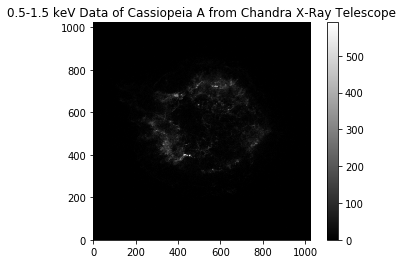

In [5]:
plt.figure()
plt.imshow(r1, origin='lower', cmap='gray')
plt.colorbar()
plt.title('0.5-1.5 keV Data of Cassiopeia A from Chandra X-Ray Telescope')
plt.savefig('../files/CassiopeiaA_red.png')

### Plot the 3 channels to create an RGB image, then save image

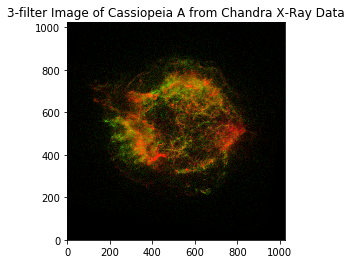

In [6]:
plt.figure()
image = make_lupton_rgb(r1, g1, b1, stretch=50)
plt.imshow(image, origin = 'lower')
plt.title('3-filter Image of Cassiopeia A from Chandra X-Ray Data')
plt.savefig('../files/CassiopeiaA.png')